In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [ ]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1.0,8.0,43.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,25.951557,86.886038,2
1,1.0,7.0,11.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358,100.644197,1
2,1.0,9.0,41.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,27.548209,95.928640,1
3,1.0,11.0,48.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,26.122449,73.203730,2
4,1.0,11.0,30.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1.0,22.038567,105.714492,1


In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
#dataset.iloc[:,:-1]

In [ ]:
#dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
# new_y = np.asarray(y)
# (unique,counts) = np.unique(new_y,return_counts =True)
# print(unique)
# print(counts)
# print(new_y.shape)
oversample = RandomOverSampler(random_state=42)
X_randomover, y_randomover = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_randomover, y_randomover, test_size=0.2, random_state = 2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
y_train = to_categorical(y_train,dtype="uint8")
# #print(y_train_new.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)

print(X_train.shape)
print(X_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(486184, 6)
(1944736, 28)
(486184, 28)


In [ ]:
Counter(y_randomover)

Counter({1: 486184, 2: 486184, 3: 486184, 4: 486184, 5: 486184})

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(1944736, 28, 1)
(486184, 28, 1)


In [ ]:
from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, SimpleRNN


def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=16, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))  
  model.add(Dropout(0.2))
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))
  # model.add(keras.layers.Dense (64,activation='relu')) #input layer
  # model.add(Dropout(0.2))
  model.add(Dense (26,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output

  epochs = 400
  batch_size = 64
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=20, batch_size=128, verbose=1)
  # val_acc = model.evaluate(X_val, y_val, verbose = 1)
  # predictions = model.predict_classes(X_test)
  # print(classification_report(y_test,predictions))
  # print(confusion_matrix(y_test,predictions))
  return history, model

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

Epoch 1/20
15194/15194 [==============================] - 89s 6ms/step - loss: 0.4256 - accuracy: 0.8422 - val_loss: 0.4514 - val_accuracy: 0.8830
Epoch 2/20
15194/15194 [==============================] - 87s 6ms/step - loss: 0.2020 - accuracy: 0.9399 - val_loss: 0.1563 - val_accuracy: 0.9352
Epoch 3/20
15194/15194 [==============================] - 89s 6ms/step - loss: 0.1946 - accuracy: 0.9564 - val_loss: 0.1512 - val_accuracy: 0.9512
Epoch 4/20
15194/15194 [==============================] - 88s 6ms/step - loss: 0.1600 - accuracy: 0.9665 - val_loss: 0.0810 - val_accuracy: 0.9782
Epoch 5/20
15194/15194 [==============================] - 87s 6ms/step - loss: 0.3380 - accuracy: 0.9721 - val_loss: 0.0675 - val_accuracy: 0.9835
Epoch 6/20
15194/15194 [==============================] - 87s 6ms/step - loss: 0.2423 - accuracy: 0.9729 - val_loss: 0.0651 - val_accuracy: 0.9856
Epoch 7/20
15194/15194 [==============================] - 86s 6ms/step - loss: 0.1819 - accuracy: 0.9721 - val_loss: 0

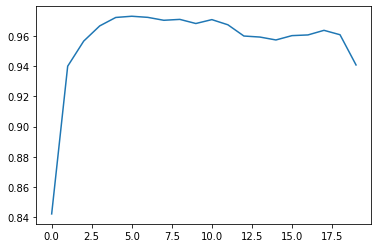

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[6.4811370e-09 3.9736938e-30 4.8548526e-01 4.9487931e-01 1.7356720e-02
  2.2786525e-03]
 [7.3091426e-09 2.3101172e-37 3.4297153e-01 6.3978553e-01 1.5663248e-02
  1.5796510e-03]
 [9.7001684e-10 9.0419370e-01 7.6448329e-02 8.1768259e-03 2.2458981e-03
  8.9352774e-03]
 ...
 [9.7001684e-10 9.0419370e-01 7.6448329e-02 8.1768259e-03 2.2458981e-03
  8.9352774e-03]
 [9.2330005e-10 0.0000000e+00 1.4160158e-06 9.9992692e-01 7.1520320e-05
  1.4536317e-07]
 [2.5062481e-09 0.0000000e+00 2.3626402e-04 9.9907970e-01 6.7777373e-04
  6.1975693e-06]]
[3 3 1 ... 1 3 3]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[97213    41     2     0     0]
 [    8 97257     6     1     1]
 [    0     0 97349     0     4]
 [    0     0 36218 60666   390]
 [ 2197  1888     0  2640 90303]]


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.91



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.9107416122291149
0.9107416122291149
0.9107416122291149


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Satge 5']))





Classification Report

              precision    recall  f1-score   support

     Stage 1       0.98      1.00      0.99     97256
     Stage 2       0.98      1.00      0.99     97273
     Stage 3       0.73      1.00      0.84     97353
     Stage 4       0.96      0.62      0.76     97274
     Satge 5       1.00      0.93      0.96     97028

    accuracy                           0.91    486184
   macro avg       0.93      0.91      0.91    486184
weighted avg       0.93      0.91      0.91    486184



In [ ]:
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Satge 5']

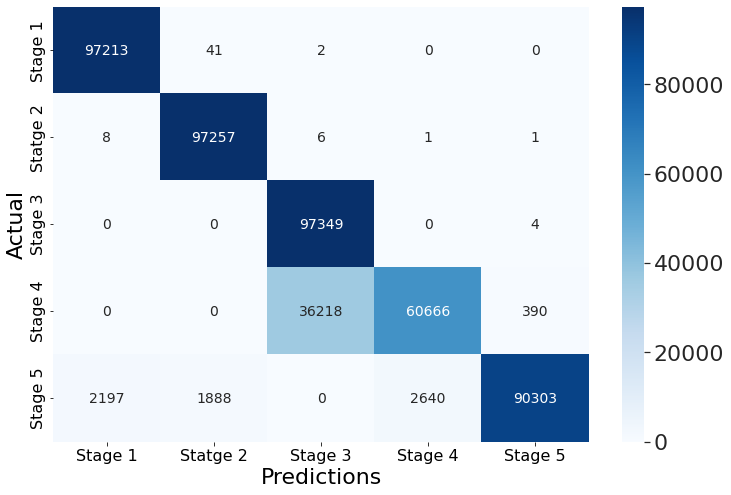

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (12, 8))
target_names=['Stage 1', 'Statge 2', 'Stage 3','Stage 4','Stage 5',]
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":14},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('SimpleRNN-ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)
# plt.show()

In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

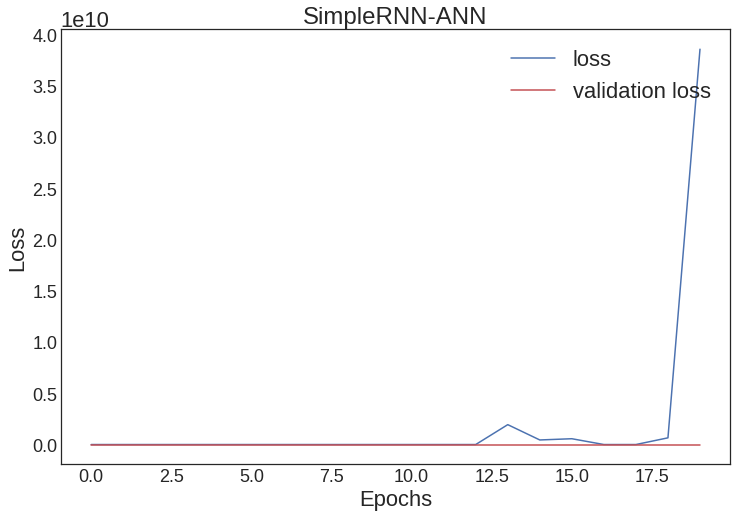

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
fig = plt.subplots(1,1, figsize = (12, 8))
#fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
plt.savefig('SimpleRNN-ANN.png', dpi=100)

In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

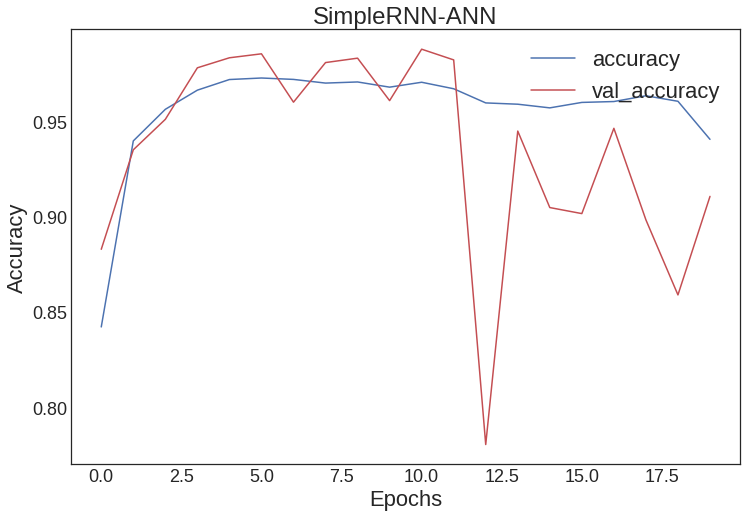

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
fig = plt.subplots(1,1, figsize = (12, 8))
# fig = plt.figure()
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Accuracy',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.show()
plt.savefig('SimpleRNN-ANN.png', dpi=300)

In [ ]:
#from google.colab import files
#files.download('SimpleRNN-ANN.png') 

In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.944210173891812


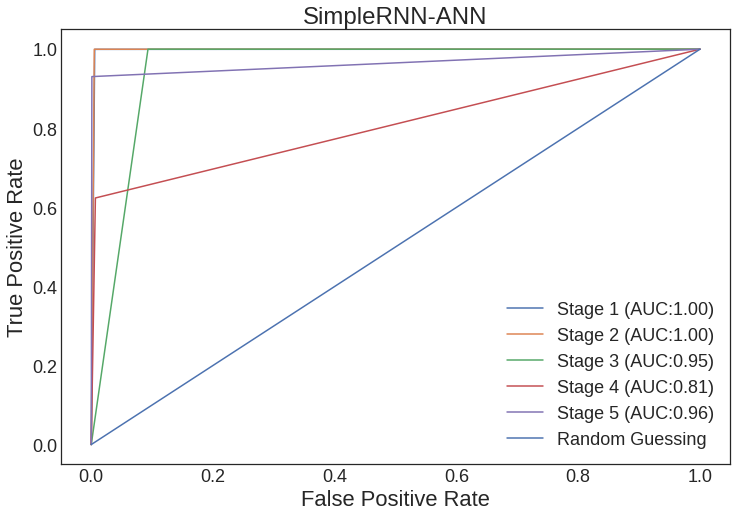

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('SimpleRNN-ANN_AUC.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('SimpleRNN-ANN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# #plt.style.use('seaborn-white')

# target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# # set plot figure size
# fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_classes_1)
#     y_test = lb.transform(y_classes_1)
#     y_pred = lb.transform(y_classes)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
#         c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)
# print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
# c_ax.legend(fontsize=18,)
# #c_ax.legend()
# c_ax.set_xlabel('False Positive Rate',)
# c_ax.set_ylabel('True Positive rate')
# plt.show()



In [ ]:
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D

# def evaluate_model_LSTM(X_train, X_val, y_train, y_val):
#   model = LSTM
#   timesteps=125
#   dims=4
#   model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(X_train.shape[1],1)))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
#   model.add(keras.layers.Dense (64,activation='relu')) #input layer
#   model.add(Dropout(0.2))
#   model.add(keras.layers.Dense (32,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (16,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (6,activation='softmax')) #output


#   epochs = 400
#   batch_size = 64
#   model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#   model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=128, verbose=1)
#   val_acc = model.evaluate(X_val, y_val, verbose = 1)
#   return model, val_acc

# #model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())

In [ ]:
# n_folds = 1
# cv_scores, model_history = list(), list()
# for _ in range(n_folds):  
#   # split data
#   # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
#   # evaluate model
#   print(X_train.shape)
#   print(y_train.shape)
#   print(X_test.shape)
#   print(y_test.shape)
#   model = tf.keras.Sequential()
#   model, test_acc = evaluate_model_LSTM(X_train, X_test, y_train, y_test)
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])